# 2D Orbit view
Create plots of Cassini's observation geometries during flybys E13, E17, and E19.

In [1]:
from scripts.tool_defs  import *

Retrieve SPICE data.

In [4]:
METAKR = "../data/cassMetaK.txt"
SCLKID = -82
spice.furnsh(METAKR)

# enter flyby to plot (E17, E13, or E19)
flyby = "E17"

if flyby == "E17":
    # start and end of VIMS observations in mosaic
    utc_start = "03/27/2012 09:53:14"
    utc_end = "03/27/2012 14:49:33"
    # highlights from VIMS E17 mosaic
    utc_range_fiveb = ["03/27/2012 12:32:05", "03/27/2012 13:03:50"]    # bright band observations
    utc_range_bright = ["03/27/2012 14:01:36", utc_end]                 # bright area observations
    highlights = True

elif flyby == "E19":
    utc_start = "05/02/2012 05:07:13"
    utc_end = "05/02/2012 06:02:00"
    utc_range_fiveb = [utc_start, utc_end]
    utc_range_bright = [utc_start, utc_end]
    highlights = False

elif flyby == "E13":
    utc_start = "12/20/2010 22:53:39"
    utc_end = "12/21/2010 00:00:40"
    highlights = False

print("flyby =", flyby)
print("start UTC = ", utc_start)
print("end UTC = ", utc_end)

# convert to ephemeris time
et_start = spice.str2et(utc_start)
et_end = spice.str2et(utc_end)
# time steps
step = 1000
# time range
times = np.array([x * (et_end - et_start) / step + et_start for x in range(step)])

# Cartesian positions of relevant bodies as seen from Saturn in the J2000 reference frame (km)
pos_sun, ltime = spice.spkpos('SUN', times, 'J2000', 'LT+S', 'SATURN')
pos_enc, ltime_enc = spice.spkpos('ENCELADUS', times, 'J2000', 'LT+S', 'SATURN')
pos_dio, ltime_dio = spice.spkpos('DIONE', times, 'J2000', 'LT+S', 'SATURN')
pos_tet, ltime_tet = spice.spkpos('TETHYS', times, 'J2000', 'LT+S', 'SATURN')
pos_rhea, ltime_rhea = spice.spkpos('RHEA', times, 'J2000', 'LT+S', 'SATURN')

# Position of CASSINI as seen from Saturn in the J2000 frame (km)
pos_cas, ltime_cas = spice.spkpos('CASSINI', times, 'J2000', 'LT+S', 'SATURN')
# Position of CASSINI as seen from Saturn in the IAU_Saturn frame(km)
pos_cas_sat, ltime_cas_sat = spice.spkpos('CASSINI', times, 'IAU_SATURN', 'LT+S', 'SATURN')
ring_h = pos_cas_sat[:,2]  # get Cassini height above ring plane

# get saturn [equatorial_radius1, equatorial_radius2, polar_radius]
dim, sat_radii = spice.bodvrd('SATURN', 'RADII', 3)
sat_radius =  np.mean(sat_radii)                        # calculate the mean radius
hor_dist= np.linalg.norm(pos_cas_sat[:,:-1], axis=1)    # get distance in equatorial plane
hor_dist_sr = hor_dist/sat_radius                       # express in satrun radius RS

# ------------------ observation highlights (only for E17) ------------------------
if highlights:
    et_range_fiveb = [spice.str2et(utc_range_fiveb[0]), spice.str2et(utc_range_fiveb[1])]
    et_range_bright = [spice.str2et(utc_range_bright[0]), spice.str2et(utc_range_bright[1])]
    # time steps
    step = 1000
    times_five = np.array([x * (et_range_fiveb[1] - et_range_fiveb[0]) / step + et_range_fiveb[0] for x in range(step)])
    times_bright = np.array([x * (et_range_bright[1] - et_range_bright[0]) / step + et_range_bright[0] for x in range(step)])

    # Cassini positions
    pos_cas_sat_five, ltime_cas_sat_five = spice.spkpos('CASSINI', times_five, 'IAU_SATURN', 'LT+S', 'SATURN')
    pos_cas_sat_bright, ltime_cas_sat_bright = spice.spkpos('CASSINI', times_bright, 'IAU_SATURN', 'LT+S', 'SATURN')

    ring_h_five = pos_cas_sat_five[:,2]  # get height above ring plane
    ring_h_bright = pos_cas_sat_bright[:,2]  # get height above ring plane
    hor_dist_five = np.linalg.norm(pos_cas_sat_five[:,:-1], axis=1)/sat_radius   # get distance in equatorial plane
    hor_dist_bright = np.linalg.norm(pos_cas_sat_bright[:,:-1], axis=1)/sat_radius   # get distance in equatorial plane

flyby = E17
start UTC =  03/27/2012 09:53:14
end UTC =  03/27/2012 14:49:33


Plot edge-on and top-down view of Cassini position in a saturn-centred frame for the selected flyby.

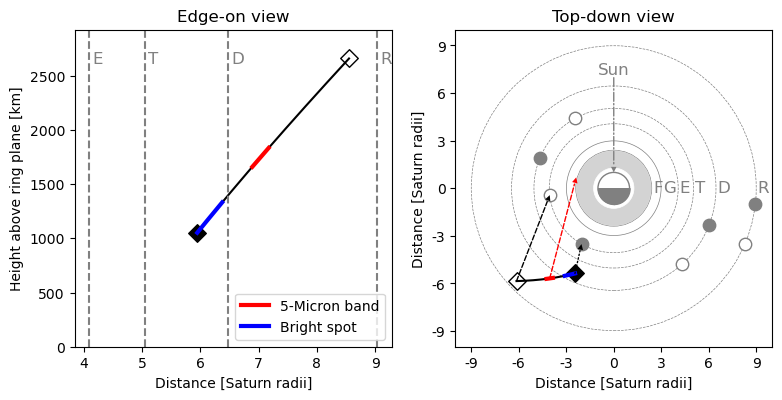

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(9, 5))

# ---------------------------------- edge-on view -----------------------------------------
axs[0].set_title("Edge-on view")
# cassini trajectory
axs[0].plot(hor_dist_sr, ring_h, color="black")
# cassini start position
axs[0].scatter(hor_dist_sr[0], ring_h[0], s=80, facecolors='white', edgecolors='black', marker="D")
# cassini end position
axs[0].scatter(hor_dist_sr[-1], ring_h[-1], s=80, facecolors='black', edgecolors='black', marker="D")

# highlights
if highlights:
    axs[0].plot(hor_dist_five, ring_h_five, label="5-Micron band", color="red", lw=3)
    axs[0].plot(hor_dist_bright, ring_h_bright, label="Bright spot", color="blue", lw=3)

# vertical lines for moon orbit positions
avg_dist_enc = np.mean(np.linalg.norm(pos_enc, axis=1))/sat_radius
avg_dist_tet = np.mean(np.linalg.norm(pos_tet, axis=1))/sat_radius
avg_dist_dio = np.mean(np.linalg.norm(pos_dio, axis=1))/sat_radius
avg_dist_rhea = np.mean(np.linalg.norm(pos_rhea, axis=1))/sat_radius

axs[0].axvline(avg_dist_enc, linestyle='--', color="grey")
axs[0].text(avg_dist_enc+0.05, np.max(ring_h), 'E', color='grey', fontsize=12, ha='left', va='center')
axs[0].axvline(avg_dist_tet, linestyle='--', color="grey")
axs[0].text(avg_dist_tet+0.05, np.max(ring_h), 'T', color='grey', fontsize=12, ha='left', va='center')
axs[0].axvline(avg_dist_dio, linestyle='--', color="grey")
axs[0].text(avg_dist_dio+0.05, np.max(ring_h), 'D', color='grey', fontsize=12, ha='left', va='center')
axs[0].axvline(avg_dist_rhea, linestyle='--', color="grey")
axs[0].text(avg_dist_rhea+0.05, np.max(ring_h), 'R', color='grey', fontsize=12, ha='left', va='center')

axs[0].set_xlabel("Distance [Saturn radii]")
axs[0].set_ylabel("Height above ring plane [km]")
axs[0].set_ylim(0, np.max(ring_h)+np.max(ring_h)/10)
axs[0].set_box_aspect(1)  # Aspect ratio 1:1, but with different units

if highlights:
    axs[0].legend()

# ------------------------------------------ top-down view --------------------------------------------

# List of Saturn's moons to be shown
moons = ['ENCELADUS', 'TETHYS', 'DIONE', 'RHEA' ]
moon_lbls = ["E", "T", "D", "R"]

if flyby == "E13":
    moon_lbls = ["E", "", "", ""] # only print Enceladus text

# Define the time step
time_step = 60  # seconds
# Generate an array of ET times
et_times = np.arange(et_start, et_end, time_step)

# Get the rotation matrix from J2000 to IAU_SATURN at the start time
rot_matrix_j2000_to_saturn = spice.pxform('J2000', 'IAU_SATURN', et_start)
# get sun position and transform to IAU saturn at start time
pos_sun, _ = spice.spkpos("SUN", np.mean(et_times), 'J2000', 'LT+S', 'SATURN')
transformed_pos = np.dot(rot_matrix_j2000_to_saturn.T, pos_sun)
x_sun, y_sun = transformed_pos[0], transformed_pos[1]

# Calculate the angle to rotate the plot so that the Sun appears North (top-center)
angle_to_rotate = np.arctan2(y_sun, x_sun) - np.pi / 2  # To align with the negative y-axis

# Function to rotate coordinates
def rotate_coords(x, y, angle):
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    x_rot = cos_angle * x - sin_angle * y
    y_rot = sin_angle * x + cos_angle * y
    return x_rot, y_rot

# Plot Saturn F-ring
fring_radius = 140220
axs[1].add_patch(plt.Circle((0, 0), fring_radius, color='grey', fill=False, lw=0.5))
axs[1].text(fring_radius + sat_radius / 10, 0, "F", color='grey', fontsize=12, ha='left', va='center')
# Saturn G-ring
gring_radius = 349554 / 2
axs[1].add_patch(plt.Circle((0, 0), gring_radius, color='grey', fill=False, lw=0.5))
axs[1].text(gring_radius + sat_radius / 10, 0, "G", color='grey', fontsize=12, ha='left', va='center')
# inner ring system
atlas_a_radius = 137670
axs[1].add_patch(plt.Circle((0, 0), atlas_a_radius, color='lightgrey', fill=True, lw=0.5))
dring_radius = 74510
axs[1].add_patch(plt.Circle((0, 0), dring_radius, color='white', fill=True, lw=0.5))

# Saturn body
# Create the white (illuminated) half-circle of Saturn body
theta = np.linspace(0, np.pi, 100)
x_circle = sat_radius * np.cos(theta)
y_circle = sat_radius * np.sin(theta)
axs[1].fill_betweenx(y_circle, x_circle, color='white')
# Create the black (dark) half-circle
theta = np.linspace(np.pi, 2*np.pi, 100)
x_circle = sat_radius * np.cos(theta)
y_circle = sat_radius * np.sin(theta)
axs[1].fill_betweenx(y_circle, x_circle, color='grey')
# outline
circle1 = plt.Circle((0, 0), sat_radius, color='grey', fill=False)
axs[1].add_patch(circle1)


# Rotate and plot the Sun direction vector
start_x, start_y = rotate_coords(x_sun, y_sun, -angle_to_rotate)
end_x, end_y = rotate_coords(0, 0, -angle_to_rotate)
dx = end_x - start_x
dy = end_y - start_y
# define scale based on flyby
if flyby == "E13":
    arrowStart = (0, sat_radius * 3.5)
else:
    arrowStart = (0, sat_radius * 7)
arrowStop=(0, sat_radius)
arrowColor="grey"
axs[1].annotate("",arrowStop,xytext=arrowStart,arrowprops=dict(arrowstyle="-",shrinkA=0,shrinkB=5,edgecolor=arrowColor,facecolor="none",linestyle="dashdot"))
axs[1].annotate("",arrowStop,xytext=arrowStart,arrowprops=dict(linewidth=0,arrowstyle="-|>",shrinkA=0,shrinkB=0,edgecolor="none",facecolor=arrowColor,linestyle="solid"))
axs[1].text(0, arrowStart[1]+sat_radius/2, 'Sun', color='grey', fontsize=12, ha='center', va='center')

# Plot Cassini trajectory
x_positions_cas = []
y_positions_cas = []
for et in et_times:
    pos_cassini, _ = spice.spkpos("CASSINI", et, 'J2000', 'NONE', 'SATURN')
    transformed_pos_cassini = np.dot(rot_matrix_j2000_to_saturn.T, pos_cassini)
    x, y = rotate_coords(transformed_pos_cassini[0], transformed_pos_cassini[1], -angle_to_rotate)
    x_positions_cas.append(x)
    y_positions_cas.append(y)

axs[1].plot(x_positions_cas, y_positions_cas, label="Cassini trajectory", color="black")
axs[1].scatter(x_positions_cas[0], y_positions_cas[0], s=80, facecolors='white', edgecolors='black', marker="D")
axs[1].scatter(x_positions_cas[-1], y_positions_cas[-1], s=80, facecolors='black', edgecolors='black', marker="D")

# Cassini highlights
if highlights:
    x_positions_cas_five = []
    y_positions_cas_five = []
    for et in times_five:
        pos_cas_sat_five, ltime_cas_sat_five = spice.spkpos('CASSINI', et, 'J2000', 'None', 'SATURN')
        transformed_pos_cassini = np.dot(rot_matrix_j2000_to_saturn.T, pos_cas_sat_five)
        x, y = rotate_coords(transformed_pos_cassini[0], transformed_pos_cassini[1], -angle_to_rotate)
        x_positions_cas_five.append(x)
        y_positions_cas_five.append(y)

    # bright spot
    x_positions_cas_bright = []
    y_positions_cas_bright = []
    for et in times_bright:
        pos_cas_sat_bright, ltime_cas_sat_bright = spice.spkpos('CASSINI', et, 'J2000', 'None', 'SATURN')
        transformed_pos_cassini = np.dot(rot_matrix_j2000_to_saturn.T, pos_cas_sat_bright)
        x, y = rotate_coords(transformed_pos_cassini[0], transformed_pos_cassini[1], -angle_to_rotate)
        x_positions_cas_bright.append(x)
        y_positions_cas_bright.append(y)

    axs[1].plot(x_positions_cas_bright, y_positions_cas_bright, label="bright spot", color="blue", lw=3)
    axs[1].plot(x_positions_cas_five, y_positions_cas_five, label="5-micron band", color="red", lw=3)

    # bright band VIMS observation direction
    times_five_avg = np.mean(times_five)
    pos, _ = spice.spkpos("ENCELADUS", times_five_avg, 'J2000', 'NONE', 'SATURN')
    transformed_pos = np.dot(rot_matrix_j2000_to_saturn.T, pos)
    xe_five, ye_five = rotate_coords(transformed_pos[0], transformed_pos[1], -angle_to_rotate)

    avg_x_five = np.mean(x_positions_cas_five)
    avg_y_five = np.mean(y_positions_cas_five)
    dx, dy = xe_five-avg_x_five, ye_five-avg_y_five
    multiply = 2
    arrowStart = (avg_x_five, avg_y_five)
    arrowStop = (xe_five, ye_five)
    arrowStop = (avg_x_five + multiply * dx, avg_y_five + multiply * dy)
    arrowColor = "red"
    axs[1].annotate("", arrowStop, xytext=arrowStart,
                    arrowprops=dict(arrowstyle="-", shrinkA=0, shrinkB=5, edgecolor=arrowColor, facecolor="none",
                                    linestyle="dashed"))
    axs[1].annotate("", arrowStop, xytext=arrowStart,
                    arrowprops=dict(linewidth=0, arrowstyle="-|>", shrinkA=0, shrinkB=0, edgecolor="none",
                                    facecolor=arrowColor, linestyle="solid"))

# Loop over each moon
for i, moon in enumerate(moons):
    x_positions = []
    y_positions = []
    for et in et_times:
        pos, _ = spice.spkpos(moon, et, 'J2000', 'NONE', 'SATURN')
        transformed_pos = np.dot(rot_matrix_j2000_to_saturn.T, pos)
        x, y = rotate_coords(transformed_pos[0], transformed_pos[1], -angle_to_rotate)
        x_positions.append(x)
        y_positions.append(y)

    if moon == "ENCELADUS":
        enc_start_pos = [x_positions[0], y_positions[0]]
        enc_end_pos = [x_positions[-1], y_positions[-1]]
        start_pos = enc_start_pos
        end_pos = enc_end_pos

    else:
        start_pos = [x_positions[0], y_positions[0]]
        end_pos = [x_positions[-1], y_positions[-1]]

    # plot positions
    # plt.plot(x_positions, y_positions, label=moon)
    # plot circular orbits
    xy_array = np.vstack((np.array(x_positions).T, np.array(y_positions).T)).T
    orbit_radius = np.mean(np.linalg.norm(xy_array, axis=1))
    axs[1].add_patch(plt.Circle((0, 0), orbit_radius, color='grey', fill=False, linestyle='--', lw=0.5))
    axs[1].text(orbit_radius+sat_radius/10, 0, f"{moon_lbls[i]}", color='grey', fontsize=12, ha='left', va='center')
    # start and end positions
    axs[1].scatter(start_pos[0], start_pos[1], s=80, facecolors='white', edgecolors='grey')
    axs[1].scatter(end_pos[0], end_pos[1], s=80, facecolors='grey', edgecolors='grey')

# Plot VIMS line of sight at start and end position
# Define start and end positions
start_pos = np.array([x_positions_cas[0], y_positions_cas[0]])
end_pos = np.array(enc_start_pos)  # For the first arrow
# Calculate the direction vector from start to end
direction_vector = end_pos - start_pos
distance = np.linalg.norm(direction_vector)
# Normalize the direction vector
direction_vector_normalized = direction_vector / distance
# Adjust the distance for the arrow so the tip aligns with the endpoint
arrow_head_length = distance / 10
arrow_length = distance - arrow_head_length
# Calculate the new end point for the arrow
arrow_dx = direction_vector_normalized[0] * arrow_length
arrow_dy = direction_vector_normalized[1] * arrow_length
# Plot the arrow
arrowStart=(start_pos[0], start_pos[1])
arrowStop=(end_pos[0], end_pos[1])
arrowColor="black"
axs[1].annotate("",arrowStop,xytext=arrowStart,arrowprops=dict(arrowstyle="-",shrinkA=0,shrinkB=5,edgecolor=arrowColor,facecolor="none",linestyle="dashed"))
axs[1].annotate("",arrowStop,xytext=arrowStart,arrowprops=dict(linewidth=0,arrowstyle="-|>",shrinkA=0,shrinkB=0,edgecolor="none",facecolor=arrowColor,linestyle="solid"))

# Repeat for the end arrow
start_pos_end = np.array([x_positions_cas[-1], y_positions_cas[-1]])
end_pos_end = np.array(enc_end_pos)  # For the second arrow
# Calculate the direction vector from start to end
direction_vector_end = end_pos_end - start_pos_end
distance_end = np.linalg.norm(direction_vector_end)
# Normalize the direction vector
direction_vector_normalized_end = direction_vector_end / distance_end
# Adjust the distance for the arrow so the tip aligns with the endpoint
arrow_length_end = distance_end - arrow_head_length
# Calculate the new end point for the arrow
arrow_dx_end = direction_vector_normalized_end[0] * arrow_length_end
arrow_dy_end = direction_vector_normalized_end[1] * arrow_length_end
# Plot the arrow
arrowStart=(start_pos_end[0], start_pos_end[1])
arrowStop=(end_pos_end[0], end_pos_end[1])
arrowColor="black"
axs[1].annotate("",arrowStop,xytext=arrowStart,arrowprops=dict(arrowstyle="-",shrinkA=0,shrinkB=5,edgecolor=arrowColor,facecolor="none",linestyle="dotted"), label="ISS/VIMS view")
axs[1].annotate("",arrowStop,xytext=arrowStart,arrowprops=dict(linewidth=0,arrowstyle="-|>",shrinkA=0,shrinkB=0,edgecolor="none",facecolor=arrowColor,linestyle="solid"))

# plot window extent
a_rhea = 527040   # km
if flyby == "E13":
    axs[1].set_xlim(-sat_radius, 5* sat_radius)
    axs[1].set_ylim(-sat_radius, 5* sat_radius)
    xticks_km = np.linspace(-sat_radius, 5 * sat_radius, 7)  # Adjust the number of ticks as needed
    yticks_km = np.linspace(-sat_radius, 5 * sat_radius, 7)

else:
    # Set the ticks in kilometers
    axs[1].set_xlim(-a_rhea - sat_radius, a_rhea + sat_radius)
    axs[1].set_ylim(-a_rhea - sat_radius, a_rhea + sat_radius)
    xticks_km = np.linspace(-a_rhea, a_rhea, 7)  # Adjust the number of ticks as needed
    yticks_km = np.linspace(-a_rhea, a_rhea, 7)


axs[1].set_xticks(xticks_km)
axs[1].set_yticks(yticks_km)

# Convert tick labels to Saturn radii
xticks_sr = xticks_km / sat_radius
yticks_sr = yticks_km / sat_radius
axs[1].set_xticklabels([f'{tick:.0f}' for tick in xticks_sr])
axs[1].set_yticklabels([f'{tick:.0f}' for tick in yticks_sr])

# Optionally add axis labels for clarity
axs[1].set_xlabel('Distance [Saturn radii]')
axs[1].set_ylabel('Distance [Saturn radii]')
axs[1].set_title('Top-down view')
axs[1].set_aspect('equal', adjustable='box')  # Ensure equal scaling for x and y axes

# Show the plot
plt.show()

# Top-down view of all flybys

flyby =  E13
start UTC =  12/20/2010 22:53:39
end UTC =  12/21/2010 00:00:40
flyby =  E17
start UTC =  03/27/2012 09:53:14
end UTC =  03/27/2012 14:49:33
flyby =  E19
start UTC =  05/02/2012 05:07:13
end UTC =  05/02/2012 06:02:00


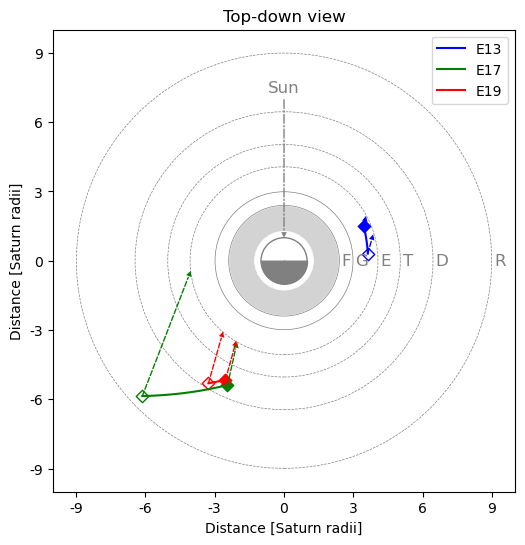

In [8]:
flybys = ["E13", "E17", "E19"]
# other flybys with suspicious stripes
# flybys = ["E13", "E17", "E19", "D5", "162RH", "T17"]

f = 0
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
for flyby in flybys:
    if flyby == "E17":
        utc_start = "03/27/2012 09:53:14"
        utc_end = "03/27/2012 14:49:33"
        # highlights
        utc_range_fiveb = ["03/27/2012 12:32:05", "03/27/2012 13:03:50"]
        utc_range_bright = ["03/27/2012 14:01:36", utc_end]
        highlights = False

    if flyby == "E19":
        utc_start = "05/02/2012 05:07:13"
        utc_end = "05/02/2012 06:02:00"
        utc_range_fiveb = [utc_start, utc_end]
        utc_range_bright = [utc_start, utc_end]
        highlights = False

    if flyby == "E13":
        utc_start = "12/20/2010 22:53:39"
        utc_end = "12/21/2010 00:00:40"
        highlights = False

    if flyby == "D5":
        utc_start = "08/17/2015 21:45:26"
        utc_end = "08/17/2015 22:11:05"
        highlights = False
    if flyby == "162RH":
        utc_start = "03/10/2012 13:35:00"
        utc_end = "03/10/2012 13:49:00"
        highlights = False
    if flyby == "T17":
        utc_start = "09/07/2006 04:36:00"
        utc_end = "09/07/2006 04:37:28"
        highlights = False
    print("flyby = ", flyby)
    print("start UTC = ", utc_start)
    print("end UTC = ", utc_end)
    et_start = spice.str2et(utc_start)
    et_end = spice.str2et(utc_end)

    # Define the time step (e.g., every minute)
    time_step = 60  # seconds
    # Generate an array of ET times
    et_times = np.arange(et_start, et_end, time_step)

    # Get the rotation matrix from J2000 to IAU_SATURN at the start time
    rot_matrix_j2000_to_saturn = spice.pxform('J2000', 'IAU_SATURN', et_start)

    # sun
    pos_sun, _ = spice.spkpos("SUN", np.mean(et_times), 'J2000', 'LT+S', 'SATURN')
    transformed_pos = np.dot(rot_matrix_j2000_to_saturn.T, pos_sun)
    x_sun, y_sun = transformed_pos[0], transformed_pos[1]

    # Calculate the angle to rotate the plot
    angle_to_rotate = np.arctan2(y_sun, x_sun) - np.pi / 2  # To align with the negative y-axis

    if f == 1:
        # List of Saturn's major moons
        moons = ['ENCELADUS', 'TETHYS', 'DIONE', 'RHEA', "TITAN"]
        moon_lbls = ["E", "T", "D", "R", "", ""]

        # Saturn F-ring
        fring_radius = 140220
        # circle1 = plt.Circle((0, 0), fring_radius, color='black', fill=False)
        axs.add_patch(plt.Circle((0, 0), fring_radius, color='grey', fill=False, lw=0.5))
        axs.text(fring_radius + sat_radius / 10, 0, "F", color='grey', fontsize=12, ha='left', va='center')

        # Saturn G-ring
        gring_radius = 349554 / 2
        # circle1 =
        axs.add_patch(plt.Circle((0, 0), gring_radius, color='grey', fill=False, lw=0.5))
        axs.text(gring_radius + sat_radius / 10, 0, "G", color='grey', fontsize=12, ha='left', va='center')

        # inner ring system
        atlas_a_radius = 137670
        axs.add_patch(plt.Circle((0, 0), atlas_a_radius, color='lightgrey', fill=True, lw=0.5))
        dring_radius = 74510
        axs.add_patch(plt.Circle((0, 0), dring_radius, color='white', fill=True, lw=0.5))

        # Create the white (illuminated) half-circle
        theta = np.linspace(0, np.pi, 100)
        x_circle = sat_radius * np.cos(theta)
        y_circle = sat_radius * np.sin(theta)
        # x_rot, y_rot = rotate_coords(x_circle, y_circle, -angle_to_rotate)
        axs.fill_betweenx(y_circle, x_circle, color='white')

        # Create the black (dark) half-circle
        theta = np.linspace(np.pi, 2*np.pi, 100)
        x_circle = sat_radius * np.cos(theta)
        y_circle = sat_radius * np.sin(theta)
        # x_rot, y_rot = rotate_coords(x_circle, y_circle, -angle_to_rotate)
        axs.fill_betweenx(y_circle, x_circle, color='grey')

        # outline
        circle1 = plt.Circle((0, 0), sat_radius, color='grey', fill=False)
        axs.add_patch(circle1)

        # Rotate and plot the Sun direction vector
        start_x, start_y = rotate_coords(x_sun, y_sun, -angle_to_rotate)
        end_x, end_y = rotate_coords(0, 0, -angle_to_rotate)
        dx = end_x - start_x
        dy = end_y - start_y

        arrowStart = (0, sat_radius * 7)
        arrowStop=(0, sat_radius)
        arrowColor="grey"
        axs.annotate("",arrowStop,xytext=arrowStart,arrowprops=dict(arrowstyle="-",shrinkA=0,shrinkB=5,edgecolor=arrowColor,facecolor="none",linestyle="dashdot"))
        axs.annotate("",arrowStop,xytext=arrowStart,arrowprops=dict(linewidth=0,arrowstyle="-|>",shrinkA=0,shrinkB=0,edgecolor="none",facecolor=arrowColor,linestyle="solid"))
        axs.text(0, arrowStart[1]+sat_radius/2, 'Sun', color='grey', fontsize=12, ha='center', va='center')

        # Loop over each moon
        for i, moon in enumerate(moons):
            x_positions = []
            y_positions = []
            for et in et_times:
                pos, _ = spice.spkpos(moon, et, 'J2000', 'NONE', 'SATURN')
                transformed_pos = np.dot(rot_matrix_j2000_to_saturn.T, pos)
                x, y = rotate_coords(transformed_pos[0], transformed_pos[1], -angle_to_rotate)
                x_positions.append(x)
                y_positions.append(y)

            start_pos = [x_positions[0], y_positions[0]]
            end_pos = [x_positions[-1], y_positions[-1]]

            # plot circular orbits
            xy_array = np.vstack((np.array(x_positions).T, np.array(y_positions).T)).T
            orbit_radius = np.mean(np.linalg.norm(xy_array, axis=1))
            axs.add_patch(plt.Circle((0, 0), orbit_radius, color='grey', fill=False, linestyle='--', lw=0.5))
            axs.text(orbit_radius + sat_radius / 10, 0, f"{moon_lbls[i]}", color='grey', fontsize=12, ha='left',
                        va='center')

    if flyby == "E13" or "E17" or "E19":
        epos_start, _ = spice.spkpos("ENCELADUS", et_start, 'J2000', 'NONE', 'SATURN')
        epos_end, _ = spice.spkpos("ENCELADUS", et_end, 'J2000', 'NONE', 'SATURN')
    if flyby == "D5":
        epos_start, _ = spice.spkpos("DIONE", et_start, 'J2000', 'NONE', 'SATURN')
        epos_end, _ = spice.spkpos("DIONE", et_end, 'J2000', 'NONE', 'SATURN')
    if flyby == "162RH":
        epos_start, _ = spice.spkpos("RHEA", et_start, 'J2000', 'NONE', 'SATURN')
        epos_end, _ = spice.spkpos("RHEA", et_end, 'J2000', 'NONE', 'SATURN')
    if flyby == "T17":
        epos_start, _ = spice.spkpos("TITAN", et_start, 'J2000', 'NONE', 'SATURN')
        epos_end, _ = spice.spkpos("TITAN", et_end, 'J2000', 'NONE', 'SATURN')

    transformed_epos_start = np.dot(rot_matrix_j2000_to_saturn.T, epos_start)
    transformed_epos_end = np.dot(rot_matrix_j2000_to_saturn.T, epos_end)
    ex_start, ey_start = rotate_coords(transformed_epos_start[0], transformed_epos_start[1], -angle_to_rotate)
    ex_end, ey_end = rotate_coords(transformed_epos_end[0], transformed_epos_end[1], -angle_to_rotate)

    # Cassini trajectory
    x_positions_cas = []
    y_positions_cas = []
    for et in et_times:
        pos_cassini, _ = spice.spkpos("CASSINI", et, 'J2000', 'NONE', 'SATURN')
        transformed_pos_cassini = np.dot(rot_matrix_j2000_to_saturn.T, pos_cassini)
        x, y = rotate_coords(transformed_pos_cassini[0], transformed_pos_cassini[1], -angle_to_rotate)
        x_positions_cas.append(x)
        y_positions_cas.append(y)

    if flyby == "E13":
        color = "b"
    elif flyby == "E17":
        color = "g"
    elif flyby == "E19":
        color = "r"
    elif flyby == "D5":
        color = 'purple'
    elif flyby == "162RH":
        color = 'pink'
    elif flyby == "T17":
        color = 'orange'
    axs.plot(x_positions_cas, y_positions_cas, label=f"{flyby}", color=color)
    axs.scatter(x_positions_cas[0], y_positions_cas[0], s=40, facecolors='white', edgecolors=color, marker="D")
    axs.scatter(x_positions_cas[-1], y_positions_cas[-1], s=40, facecolors=color, edgecolors=color, marker="D")

    # viewing
    arrowStart = (x_positions_cas[0], y_positions_cas[0])
    arrowStop = (ex_start, ey_start)
    arrowColor = color
    axs.annotate("", arrowStop, xytext=arrowStart,
                    arrowprops=dict(arrowstyle="-", shrinkA=0, shrinkB=5, edgecolor=arrowColor, facecolor="none",
                                    linestyle="dashed"))
    axs.annotate("", arrowStop, xytext=arrowStart,
                    arrowprops=dict(linewidth=0, arrowstyle="-|>", shrinkA=0, shrinkB=0, edgecolor="none",
                                    facecolor=arrowColor, linestyle="solid"))
    arrowStart = (x_positions_cas[-1], y_positions_cas[-1])
    arrowStop = (ex_end, ey_end)
    axs.annotate("", arrowStop, xytext=arrowStart,
                    arrowprops=dict(arrowstyle="-", shrinkA=0, shrinkB=5, edgecolor=arrowColor, facecolor="none",
                                    linestyle="dashed"))
    axs.annotate("", arrowStop, xytext=arrowStart,
                    arrowprops=dict(linewidth=0, arrowstyle="-|>", shrinkA=0, shrinkB=0, edgecolor="none",
                                    facecolor=arrowColor, linestyle="solid"))
    f +=1

axs.legend()
axs.set_title('Top-down view')
a_rhea = 527040   # km

# Set the ticks in kilometers
axs.set_xlim(-a_rhea - sat_radius, a_rhea + sat_radius)
axs.set_ylim(-a_rhea - sat_radius, a_rhea + sat_radius)
xticks_km = np.linspace(-a_rhea, a_rhea, 7)  # Adjust the number of ticks as needed
yticks_km = np.linspace(-a_rhea, a_rhea, 7)

axs.set_xticks(xticks_km)
axs.set_yticks(yticks_km)

# Convert tick labels to Saturn radii
xticks_sr = xticks_km / sat_radius
yticks_sr = yticks_km / sat_radius
axs.set_xticklabels([f'{tick:.0f}' for tick in xticks_sr])
axs.set_yticklabels([f'{tick:.0f}' for tick in yticks_sr])

# Optionally add axis labels for clarity
axs.set_xlabel('Distance [Saturn radii]')
axs.set_ylabel('Distance [Saturn radii]')
axs.set_aspect('equal', adjustable='box')  # Ensure equal scaling for x and y axes
# Show the plot
plt.show()